In [1]:
# prompt: unzip the /content/gait-in-neurodegenerative-disease-database-1.0.0.zip file

!unzip /content/gait-in-neurodegenerative-disease-database-1.0.0.zip

Archive:  /content/gait-in-neurodegenerative-disease-database-1.0.0.zip
 extracting: gait-in-neurodegenerative-disease-database-1.0.0/control14.hea-  
 extracting: gait-in-neurodegenerative-disease-database-1.0.0/control5.hea-  
 extracting: gait-in-neurodegenerative-disease-database-1.0.0/park6.hea-  
 extracting: gait-in-neurodegenerative-disease-database-1.0.0/hunt13.rit  
 extracting: gait-in-neurodegenerative-disease-database-1.0.0/control13.ts  
 extracting: gait-in-neurodegenerative-disease-database-1.0.0/hunt18.rit  
 extracting: gait-in-neurodegenerative-disease-database-1.0.0/als11.rit  
 extracting: gait-in-neurodegenerative-disease-database-1.0.0/control9.hea-  
 extracting: gait-in-neurodegenerative-disease-database-1.0.0/control14.rit  
 extracting: gait-in-neurodegenerative-disease-database-1.0.0/park4.ts  
 extracting: gait-in-neurodegenerative-disease-database-1.0.0/hunt6.hea  
 extracting: gait-in-neurodegenerative-disease-database-1.0.0/park2.hea  
 extracting: gait-

In [2]:
# prompt: we need to import all the necessary python libraries

import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
import seaborn as sns

In [6]:
# prompt: convert all the ts files to csv files and take them to a separate file in \content

import pandas as pd
# Directory containing the original data
source_dir = '/content/gait-in-neurodegenerative-disease-database-1.0.0'

# Directory to store the converted CSV files
output_dir = '/content/converted_csv'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Iterate through the source directory
for subdir, _, files in os.walk(source_dir):
    for file in files:
        # Check if the file is a .ts file
        if file.endswith('.ts'):
            ts_filepath = os.path.join(subdir, file)
            # Construct the output CSV filepath
            # Keep the subdirectory structure relative to the source_dir
            relative_subdir = os.path.relpath(subdir, source_dir)
            output_subdir = os.path.join(output_dir, relative_subdir)
            # Create the output subdirectory if it doesn't exist
            if not os.path.exists(output_subdir):
                os.makedirs(output_subdir)

            csv_filename = file.replace('.ts', '.csv')
            csv_filepath = os.path.join(output_subdir, csv_filename)

            try:
                # Read the .ts file
                # Assuming the .ts file is a simple delimited text file
                # You might need to adjust the delimiter based on the actual file format
                df = pd.read_csv(ts_filepath, sep='\t', header=None) # Adjust sep if needed

                # Write the DataFrame to a CSV file
                df.to_csv(csv_filepath, index=False, header=False)
                print(f"Converted {ts_filepath} to {csv_filepath}")
            except Exception as e:
                print(f"Error converting {ts_filepath}: {e}")

print("Conversion complete.")

Converted /content/gait-in-neurodegenerative-disease-database-1.0.0/als4.ts to /content/converted_csv/./als4.csv
Converted /content/gait-in-neurodegenerative-disease-database-1.0.0/hunt19.ts to /content/converted_csv/./hunt19.csv
Converted /content/gait-in-neurodegenerative-disease-database-1.0.0/control3.ts to /content/converted_csv/./control3.csv
Converted /content/gait-in-neurodegenerative-disease-database-1.0.0/control8.ts to /content/converted_csv/./control8.csv
Converted /content/gait-in-neurodegenerative-disease-database-1.0.0/control13.ts to /content/converted_csv/./control13.csv
Converted /content/gait-in-neurodegenerative-disease-database-1.0.0/als12.ts to /content/converted_csv/./als12.csv
Converted /content/gait-in-neurodegenerative-disease-database-1.0.0/hunt5.ts to /content/converted_csv/./hunt5.csv
Converted /content/gait-in-neurodegenerative-disease-database-1.0.0/hunt13.ts to /content/converted_csv/./hunt13.csv
Converted /content/gait-in-neurodegenerative-disease-datab

In [7]:
# prompt: Column	Contents
# 1	Elapsed Time (sec)
# 2	Left Stride Interval (sec)
# 3	Right Stride Interval (sec)
# 4	Left Swing Interval (sec)
# 5	Right Swing Interval (sec)
# 6	Left Swing Interval (% of stride)
# 7	Right Swing Interval (% of stride)
# 8	Left Stance Interval (sec)
# 9	Right Stance Interval (sec)
# 10	Left Stance Interval (% of stride)
# 11	Right Stance Interval (% of stride)
# 12	Double Support Interval (sec)
# 13	Double Support Interval (% of stride)
#  check if all of these contains all these files

import pandas as pd
expected_columns = [
    'Elapsed Time (sec)', 'Left Stride Interval (sec)', 'Right Stride Interval (sec)',
    'Left Swing Interval (sec)', 'Right Swing Interval (sec)',
    'Left Swing Interval (% of stride)', 'Right Swing Interval (% of stride)',
    'Left Stance Interval (sec)', 'Right Stance Interval (sec)',
    'Left Stance Interval (% of stride)', 'Right Stance Interval (% of stride)',
    'Double Support Interval (sec)', 'Double Support Interval (% of stride)'
]

# List to store files that have missing columns
files_with_missing_columns = []

# Iterate through the converted CSV files
for subdir, _, files in os.walk(output_dir):
    for file in files:
        if file.endswith('.csv'):
            csv_filepath = os.path.join(subdir, file)
            try:
                # Read the CSV file, assuming no header was written in the conversion
                # We will assume the columns are in the expected order
                df = pd.read_csv(csv_filepath, header=None)

                # Check if the number of columns matches the expected number
                if df.shape[1] != len(expected_columns):
                    print(f"Warning: File {csv_filepath} has {df.shape[1]} columns, expected {len(expected_columns)}")
                    files_with_missing_columns.append(csv_filepath)
                else:
                    print(f"File {csv_filepath} has the expected number of columns.")

            except Exception as e:
                print(f"Error reading or processing {csv_filepath}: {e}")
                files_with_missing_columns.append(csv_filepath) # Also add files that couldn't be read

if files_with_missing_columns:
    print("\nThe following files have missing columns or could not be processed:")
    for file_path in files_with_missing_columns:
        print(file_path)
else:
    print("\nAll processed CSV files have the expected number of columns.")

File /content/converted_csv/control10.csv has the expected number of columns.
File /content/converted_csv/als4.csv has the expected number of columns.
File /content/converted_csv/hunt4.csv has the expected number of columns.
File /content/converted_csv/hunt20.csv has the expected number of columns.
File /content/converted_csv/hunt6.csv has the expected number of columns.
File /content/converted_csv/control5.csv has the expected number of columns.
File /content/converted_csv/control2.csv has the expected number of columns.
File /content/converted_csv/control15.csv has the expected number of columns.
File /content/converted_csv/park14.csv has the expected number of columns.
File /content/converted_csv/hunt17.csv has the expected number of columns.
File /content/converted_csv/control16.csv has the expected number of columns.
File /content/converted_csv/als5.csv has the expected number of columns.
File /content/converted_csv/control12.csv has the expected number of columns.
File /content/c

In [15]:
# prompt: data_dict = {}
# for file in ts_files:
#     subject_id = file.replace(".ts", "")
#     # Load time series data
#     ts_data = pd.read_csv(file, sep=r"\s+", header=None)
#     ts_data.columns = [
#         "Time", "L_Stride", "R_Stride", "L_Swing", "R_Swing",
#         "L_Swing%", "R_Swing%", "L_Stance", "R_Stance",
#         "L_Stance%", "R_Stance%", "DoubleSupport", "DoubleSupport%"
#     ]
#     # Get subject-level info
#     subj_info_row = subject_info[subject_info["Unnamed: 0"] == subject_id]
#     if not subj_info_row.empty:
#         data_dict[subject_id] = {
#             "group": subject_id.split("0")[0],  # crude label e.g., 'park', 'hunt'
#             "time_series": ts_data,
#             "info": subj_info_row.to_dict(orient="records")[0]
#         }
#     else:
#         print(f"Warning: {subject_id} not found in subject-description.txt") modify this according to my .ts files

import pandas as pd
# Directory containing the converted CSV files
csv_data_dir = '/content/converted_csv'

# Read subject information
# Assuming subject-description.txt is in the base source directory
subject_info_path = '/content/gait-in-neurodegenerative-disease-database-1.0.0/subject-description.txt'
# Need to inspect the format of subject-description.txt to read it correctly
# Assuming it's space or tab delimited and the first column is the subject ID
# Let's try reading it as a tab-separated file, skipping initial comments/headers if any
try:
    subject_info = pd.read_csv(subject_info_path, sep='\t')
    # Clean up column names if necessary
    subject_info.columns = subject_info.columns.str.strip()
    # Let's see the columns to understand the structure
    print("Subject Info Columns:", subject_info.columns)
    # Assuming the first column contains the subject ID (e.g., park01, hunt02)
    # Let's rename the first column to something consistent for merging/lookup
    subject_info = subject_info.rename(columns={subject_info.columns[0]: 'Subject_ID'})
    print("Subject Info after renaming:", subject_info.head())

except FileNotFoundError:
    print(f"Error: Subject information file not found at {subject_info_path}")
    subject_info = pd.DataFrame() # Create an empty DataFrame to avoid errors
except Exception as e:
    print(f"Error reading subject information file: {e}")
    subject_info = pd.DataFrame() # Create an empty DataFrame to avoid errors


data_dict = {}
# Walk through the converted CSV directory
for subdir, _, files in os.walk(csv_data_dir):
    for file in files:
        if file.endswith(".csv"):
            csv_filepath = os.path.join(subdir, file)
            # Extract subject ID from the filename
            # Assuming filename is like park01.csv, hunt02.csv etc.
            subject_id_with_ext = os.path.basename(csv_filepath)
            subject_id = os.path.splitext(subject_id_with_ext)[0] # Removes .csv extension

            try:
                # Load time series data
                # Assuming the CSV files have no header and columns are in the order of expected_columns
                ts_data = pd.read_csv(csv_filepath, header=None)
                # Assign column names based on expected_columns
                if ts_data.shape[1] == len(expected_columns):
                    ts_data.columns = expected_columns
                else:
                     # Handle cases where files had wrong column counts during conversion check
                     print(f"Skipping {csv_filepath} due to unexpected number of columns ({ts_data.shape[1]} vs {len(expected_columns)})")
                     continue # Skip this file

                # Get subject-level info
                # Use the 'Subject_ID' column for lookup
                subj_info_row = subject_info[subject_info['Subject_ID'] == subject_id]

                if not subj_info_row.empty:
                    # Extract the group label from the subject ID
                    # Assuming ID format is like 'groupNN' (e.g., 'park01', 'hunt02')
                    # This is a simple split, might need refinement based on actual IDs
                    group = ''.join(filter(str.isalpha, subject_id)) # Extract alphabetic part
                    if not group: # Handle cases where ID is just numbers or different format
                         group = "unknown"
                         print(f"Warning: Could not determine group for subject ID: {subject_id}")


                    data_dict[subject_id] = {
                        "group": group,
                        "time_series": ts_data,
                        # Convert the selected row to a dictionary. to_dict('records')[0] is robust.
                        "info": subj_info_row.to_dict(orient="records")[0]
                    }
                else:
                    print(f"Warning: {subject_id} not found in subject-description.txt. Adding time series data but no info.")
                    # Add the time series data even if subject info is missing
                    group = ''.join(filter(str.isalpha, subject_id))
                    if not group:
                        group = "unknown"
                        print(f"Warning: Could not determine group for subject ID: {subject_id}")

                    data_dict[subject_id] = {
                        "group": group,
                        "time_series": ts_data,
                        "info": {} # Empty info dictionary
                    }
            except Exception as e:
                print(f"Error processing file {csv_filepath}: {e}")

print(f"\nSuccessfully loaded data for {len(data_dict)} subjects.")

# Example of how to access the data for a specific subject
if data_dict:
    first_subject_id = list(data_dict.keys())[0]
    print(f"\nExample access for subject: {first_subject_id}")
    print("Group:", data_dict[first_subject_id]["group"])
    print("Time Series Data Head:\n", data_dict[first_subject_id]["time_series"].head())
    print("Subject Info:\n", data_dict[first_subject_id]["info"])



Subject Info Columns: Index(['Unnamed: 0', 'GROUP', 'AGE(YRS)', 'HEIGHT(meters)', 'Weight(kg)',
       'gender', 'GaitSpeed(m/sec)', 'Duration/Severity'],
      dtype='object')
Subject Info after renaming:   Subject_ID    GROUP  AGE(YRS)  HEIGHT(meters) Weight(kg) gender  \
0   control1  control      57.0            1.94         95      f   
1   control2  control      22.0            1.94         70      m   
2   control3  control      23.0            1.83         66      f   
3   control4  control      52.0            1.78         73      f   
4   control5  control      47.0            1.94         82      f   

  GaitSpeed(m/sec)  Duration/Severity  
0             1.33                0.0  
1             1.47                0.0  
2             1.44                0.0  
3             1.54                0.0  
4             1.54                0.0  

Successfully loaded data for 64 subjects.

Example access for subject: control10
Group: control
Time Series Data Head:
    Elapsed Time (s

In [16]:
# prompt: check for missing values in any data

import pandas as pd
# Function to check for missing values in a DataFrame
def check_missing_values(df, df_name="DataFrame"):
    print(f"\n--- Checking missing values in {df_name} ---")
    # Calculate the number of missing values per column
    missing_values_count = df.isnull().sum()
    # Calculate the percentage of missing values per column
    missing_values_percent = 100 * missing_values_count / len(df)

    # Create a DataFrame to summarize the missing data
    missing_values_summary = pd.DataFrame({
        'Missing Count': missing_values_count,
        'Missing Percent (%)': missing_values_percent
    })

    # Filter to show only columns with missing values
    missing_values_summary = missing_values_summary[missing_values_summary['Missing Count'] > 0]

    if missing_values_summary.empty:
        print(f"No missing values found in {df_name}.")
    else:
        print(f"Missing values found in {df_name}:\n")
        print(missing_values_summary)
        # Optional: Display rows with missing values (can be memory intensive for large data)
        # print("\nSample rows with missing values:")
        # print(df[df.isnull().any(axis=1)].head())

# Check missing values in the subject information DataFrame
check_missing_values(subject_info, "Subject Information")

# Check missing values in the time series data for each subject
print("\n--- Checking missing values in Time Series Data for each subject ---")
if data_dict:
    for subject_id, data in data_dict.items():
        time_series_df = data["time_series"]
        check_missing_values(time_series_df, f"Time Series Data for {subject_id}")
else:
    print("No time series data loaded to check for missing values.")


--- Checking missing values in Subject Information ---
Missing values found in Subject Information:

                   Missing Count  Missing Percent (%)
Subject_ID                     1             1.538462
AGE(YRS)                       1             1.538462
HEIGHT(meters)                 1             1.538462
Weight(kg)                     1             1.538462
gender                         1             1.538462
GaitSpeed(m/sec)               1             1.538462
Duration/Severity              2             3.076923

--- Checking missing values in Time Series Data for each subject ---

--- Checking missing values in Time Series Data for control10 ---
No missing values found in Time Series Data for control10.

--- Checking missing values in Time Series Data for als4 ---
No missing values found in Time Series Data for als4.

--- Checking missing values in Time Series Data for hunt4 ---
No missing values found in Time Series Data for hunt4.

--- Checking missing values in Time

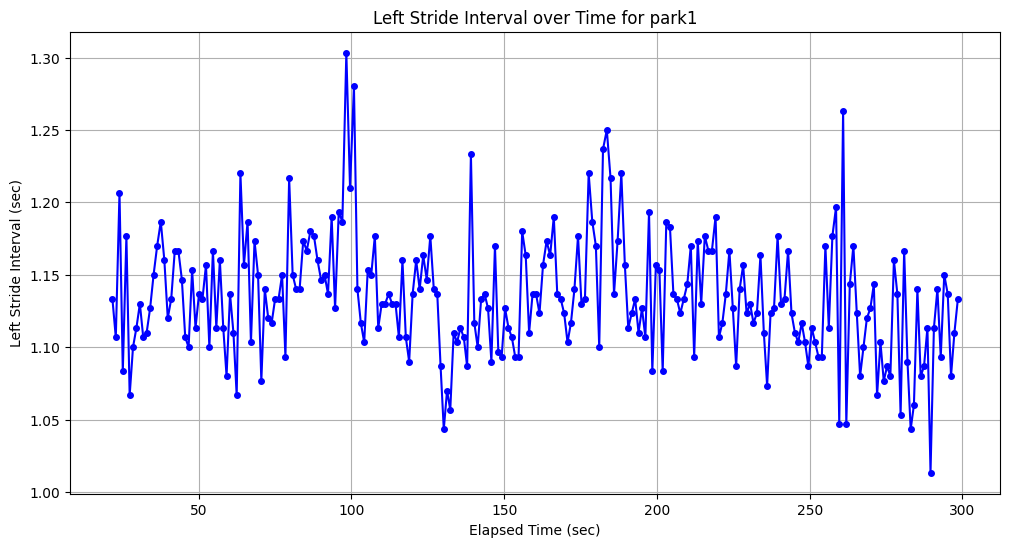

In [23]:
# prompt: plot time series graph l_stride interval over time of park1 marker o line type - colour blue

import matplotlib.pyplot as plt
# Select the data for the 'park01' subject
subject_id_to_plot = 'park1'

if subject_id_to_plot in data_dict:
    subject_data = data_dict[subject_id_to_plot]
    time_series_df = subject_data["time_series"]

    # Ensure the required columns exist
    if 'Elapsed Time (sec)' in time_series_df.columns and 'Left Stride Interval (sec)' in time_series_df.columns:
        plt.figure(figsize=(12, 6))
        plt.plot(time_series_df['Elapsed Time (sec)'], time_series_df['Left Stride Interval (sec)'],
                 marker='o', linestyle='-', color='blue', markersize=4)
        plt.title(f'Left Stride Interval over Time for {subject_id_to_plot}')
        plt.xlabel('Elapsed Time (sec)')
        plt.ylabel('Left Stride Interval (sec)')
        plt.grid(True)
        plt.show()
    else:
        print(f"Required columns not found in time series data for {subject_id_to_plot}.")
else:
    print(f"Subject '{subject_id_to_plot}' not found in the loaded data.")


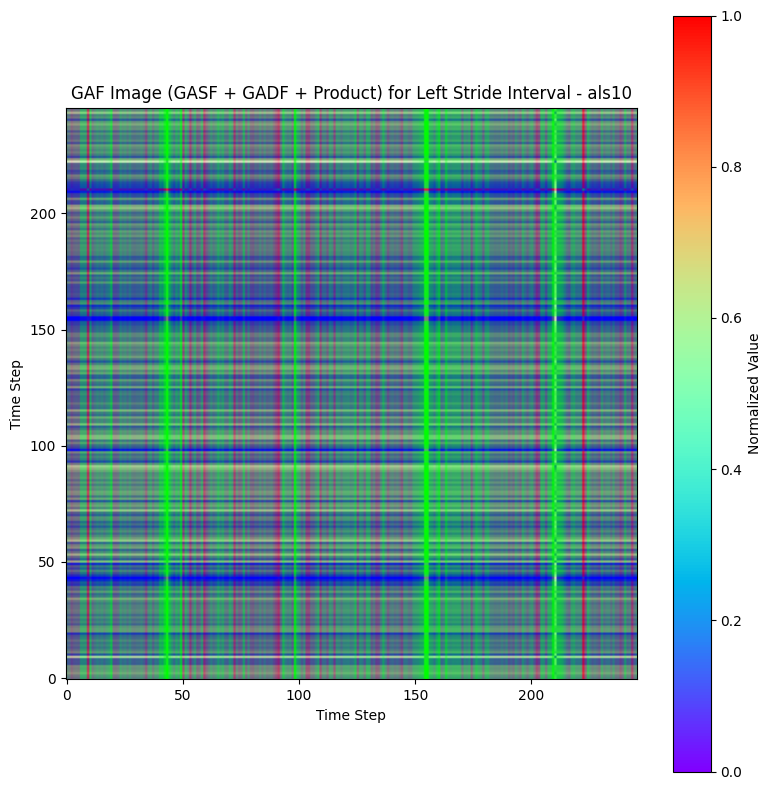

In [29]:
# prompt: plot gaf image for l stride interval for park1 by creating 3 values GASF,GADF,phi, making them to rgb values first then plotting GAF image

!pip install pyts

from pyts.image import GramianAngularField
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'park1' subject data is already loaded into `data_dict`
subject_id_to_plot = 'als10'

if subject_id_to_plot in data_dict:
    subject_data = data_dict[subject_id_to_plot]
    time_series_df = subject_data["time_series"]

    # Select the 'Left Stride Interval (sec)' column
    l_stride_interval = time_series_df['Left Stride Interval (sec)'].values

    # Ensure the data is 1D for GAF transformation
    # Reshape to (n_samples, n_timestamps) where n_samples is 1
    l_stride_interval = l_stride_interval.reshape(1, -1)

    # Initialize GAF transformer
    # method='summation' for GASF, method='difference' for GADF
    gasf = GramianAngularField(method='summation')
    gadf = GramianAngularField(method='difference')

    # Compute GAF
    gasf_image = gasf.fit_transform(l_stride_interval)
    gadf_image = gadf.fit_transform(l_stride_interval)

    # GAF images are (1, n_timestamps, n_timestamps), remove the first dimension
    gasf_image = gasf_image[0]
    gadf_image = gadf_image[0]

    # Now create a pseudo-RGB image using GASF and GADF
    # We'll use GASF for Red and Blue channels, GADF for Green channel.
    # This is a common practice to combine them into a single image.
    # You can experiment with different channel assignments.
    # We also need a third component for 'phi', which is often just a constant
    # or derived from the transformation. For simplicity, we can use a normalized version
    # of the input data stretched to the size of the GAF image, or just replicate one of the GAFs.
    # A common representation uses GASF, GADF, and the normalized time series itself (reshaped)
    # but that results in different dimensions.
    # To create an RGB image of size (n_timestamps, n_timestamps, 3), we need 3 matrices of that size.
    # Let's use GASF, GADF, and the element-wise product of GASF and GADF as the third channel.
    # Ensure values are between 0 and 1 before combining into RGB.
    # GAF output is already between -1 and 1 or 0 and 1 depending on normalization.
    # pyts GAF output is between -1 and 1. Let's normalize to 0-1 range for RGB.

    # Normalize GAF images to [0, 1]
    gasf_normalized = (gasf_image - gasf_image.min()) / (gasf_image.max() - gasf_image.min())
    gadf_normalized = (gadf_image - gadf_image.min()) / (gadf_image.max() - gadf_image.min())

    # Create the third channel ('phi'). Using the product for demonstration.
    # Ensure product is also normalized to [0, 1]
    phi_channel = gasf_image * gadf_image # Example: element-wise product
    phi_normalized = (phi_channel - phi_channel.min()) / (phi_channel.max() - phi_channel.min())


    # Stack the three channels to create the RGB image
    # Use normalized values for RGB
    gaf_rgb_image = np.stack([gasf_normalized, gadf_normalized, phi_normalized], axis=-1)

    # Plot the GAF image
    plt.figure(figsize=(8, 8))
    plt.imshow(gaf_rgb_image, cmap='rainbow', origin='lower') # Use a colormap or just display RGB
    plt.title(f'GAF Image (GASF + GADF + Product) for Left Stride Interval - {subject_id_to_plot}')
    plt.xlabel('Time Step')
    plt.ylabel('Time Step')
    plt.colorbar(label='Normalized Value') # Colorbar might not be meaningful for RGB composite
    plt.tight_layout()
    plt.show()

else:
    print(f"Subject '{subject_id_to_plot}' not found in the loaded data.")


In [30]:
# prompt: plot gasf image for l stride interval for park1

import matplotlib.pyplot as plt
# Plot the GASF image only
plt.figure(figsize=(8, 8))
# Use a sequential colormap for single-channel images like GASF
plt.imshow(gasf_normalized, cmap='viridis', origin='lower')
plt.title(f'GASF Image for Left Stride Interval - {subject_id_to_plot}')
plt.xlabel('Time Step')
plt.ylabel('Time Step')
plt.colorbar(label='Normalized Value')
plt.tight_layout()
plt.show()


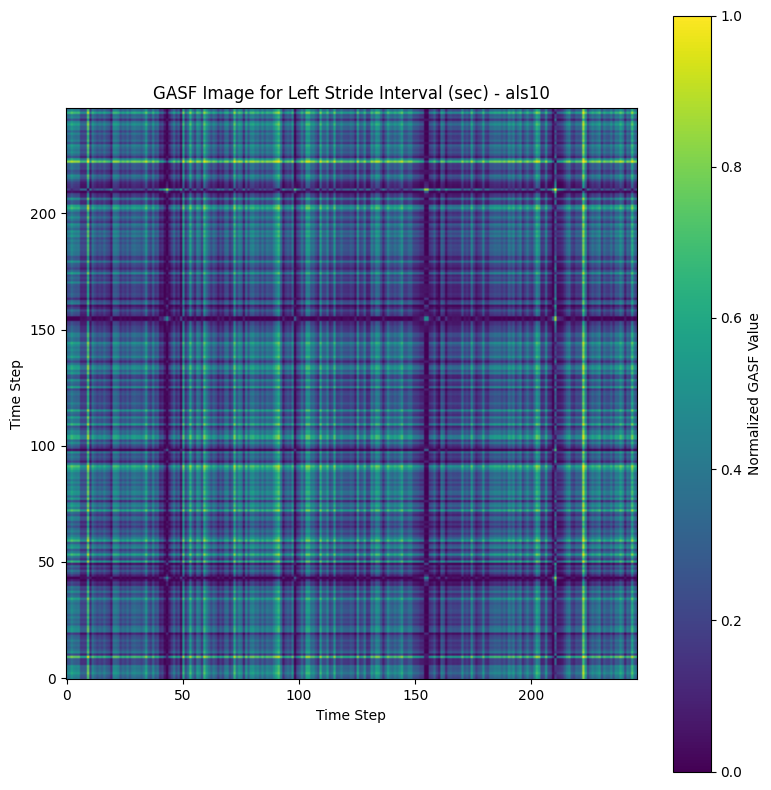

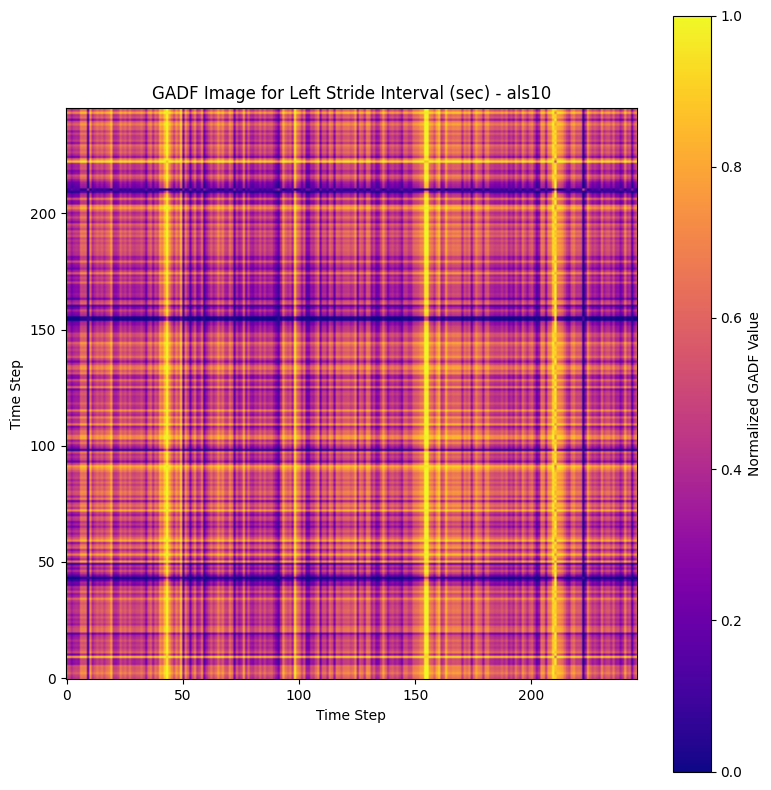

In [32]:
# prompt: import numpy as np
# import matplotlib.pyplot as plt
# from pyts.image import GramianAngularField
# # Apply RGB GAF transformation and visualize
# if not data_dict:
#     print("Error: data_dict is empty. Cannot apply GAF.")
# else:
#     try:
#         subject_id = "als10"
#         column_name = "L_Stride"  # Generalizable: change to R_Stride, L_Swing, etc.
#         ts_data = data_dict[subject_id]["time_series"]
#         signal = ts_data[column_name].values
#         # Check for valid data
#         if signal.size == 0 or not np.isfinite(signal).all():
#             print(f"Error: Invalid {column_name} data for {subject_id}")
#         else:
#             # Normalize to [-1, 1]
#             if np.max(signal) != np.min(signal):
#                 signal_normalized = 2 * ((signal - np.min(signal)) / (np.max(signal) - np.min(signal))) - 1
#             else:
#                 signal_normalized = np.zeros_like(signal)
#                 print(f"Warning: {column_name} for {subject_id} is constant, normalized to zeros")
#             # Apply GASF
#             gaf_sum = GramianAngularField(method='summation')
#             gasf_image = gaf_sum.fit_transform([signal_normalized])[0]
#             # Apply GADF
#             gaf_diff = GramianAngularField(method='difference')
#             gadf_image = gaf_diff.fit_transform([signal_normalized])[0]
#             # Normalize GASF and GADF to [0, 1] for RGB
#             gasf_norm = (gasf_image - gasf_image.min()) / (gasf_image.max() - gasf_image.min())
#             gadf_norm = (gadf_image - gadf_image.min()) / (gadf_image.max() - gadf_image.min())
#             # Create RGB image (Red: GASF, Green: GADF, Blue: zeros)
#             rgb_image = np.zeros((gasf_image.shape[0], gasf_image.shape[1], 3))
#             rgb_image[:, :, 0] = gasf_norm
#             rgb_image[:, :, 1] = gadf_norm
#             rgb_image[:, :, 2] = 0        change it according to l_stride_interval = time_series_df['Left String"]

import matplotlib.pyplot as plt
import numpy as np
# Select the 'Left Stride Interval (sec)' column
# Assuming 'Left Stride Interval (sec)' is the correct column name based on your data loading code
column_name = 'Left Stride Interval (sec)'
if column_name in time_series_df.columns:
    l_stride_interval = time_series_df[column_name].values
else:
    print(f"Error: Column '{column_name}' not found in the time series data for {subject_id_to_plot}.")
    # Exit or handle the error appropriately if the column is essential
    l_stride_interval = np.array([]) # Set to empty array to prevent further errors

# Ensure the data is not empty and contains valid numbers
if l_stride_interval.size == 0 or not np.isfinite(l_stride_interval).all():
    print(f"Error: Invalid or empty '{column_name}' data for {subject_id_to_plot}")
else:
    # Ensure the data is 1D for GAF transformation and reshape to (n_samples, n_timestamps) where n_samples is 1
    l_stride_interval = l_stride_interval.reshape(1, -1)

    # Normalize the time series data to [-1, 1] before applying GAF
    # This step is crucial for GAF and should be applied to the input time series
    # GAF transformer itself might normalize, but explicit normalization is good practice.
    # Check if the range is not zero before normalizing
    if np.max(l_stride_interval) != np.min(l_stride_interval):
        signal_normalized = 2 * ((l_stride_interval - np.min(l_stride_interval)) / (np.max(l_stride_interval) - np.min(l_stride_interval))) - 1
    else:
        # Handle constant signal case
        signal_normalized = np.zeros_like(l_stride_interval)
        print(f"Warning: '{column_name}' for {subject_id_to_plot} is constant, normalized time series to zeros.")


    # Initialize GAF transformer
    # method='summation' for GASF, method='difference' for GADF
    # The GAF transformer is applied to the normalized time series data
    gasf = GramianAngularField(method='summation')
    gadf = GramianAngularField(method='difference')

    # Compute GAF on the normalized signal
    gasf_image = gasf.fit_transform(signal_normalized)
    gadf_image = gadf.fit_transform(signal_normalized)

    # GAF images are (1, n_timestamps, n_timestamps), remove the first dimension
    gasf_image = gasf_image[0]
    gadf_image = gadf_image[0]

    # Normalize GAF images to [0, 1] for creating an RGB composite image.
    # While GAF output is typically between -1 and 1, normalizing to [0, 1] is needed for imshow RGB channels.
    gasf_normalized_for_rgb = (gasf_image - gasf_image.min()) / (gasf_image.max() - gasf_image.min())
    gadf_normalized_for_rgb = (gadf_image - gadf_image.min()) / (gadf_image.max() - gadf_image.min())

    # Create the third channel ('phi'). A common approach for the third channel
    # in a pseudo-RGB GAF image is the element-wise product of GASF and GADF.
    # Ensure the product is also normalized to [0, 1] for the RGB composite.
    phi_channel = gasf_image * gadf_image # Element-wise product
    phi_normalized_for_rgb = (phi_channel - phi_channel.min()) / (phi_channel.max() - phi_channel.min())

    # Stack the three normalized channels to create the RGB image
    # Red: GASF_normalized, Green: GADF_normalized, Blue: Phi_normalized
    gaf_rgb_image = np.stack([gasf_normalized_for_rgb, gadf_normalized_for_rgb, phi_normalized_for_rgb], axis=-1)

    # Plot the GAF RGB composite image
    plt.figure(figsize=(8, 8))
    # Display the RGB image. Use 'none' colormap as the colors are defined by the channels.
    plt.imshow(gaf_rgb_image, origin='lower')
    plt.title(f'GAF Image (GASF, GADF, Product) for {column_name} - {subject_id_to_plot}')
    plt.xlabel('Time Step')
    plt.ylabel('Time Step')
    # Colorbar is not meaningful for RGB composite, remove it
    # plt.colorbar(label='Normalized Value')
    plt.tight_layout()
    plt.show()

    # Optional: Plot the GASF image only (grayscale or with a colormap)
    plt.figure(figsize=(8, 8))
    # Use a sequential colormap for single-channel images like GASF
    plt.imshow(gasf_normalized_for_rgb, cmap='viridis', origin='lower')
    plt.title(f'GASF Image for {column_name} - {subject_id_to_plot}')
    plt.xlabel('Time Step')
    plt.ylabel('Time Step')
    plt.colorbar(label='Normalized GASF Value')
    plt.tight_layout()
    plt.show()

    # Optional: Plot the GADF image only (grayscale or with a colormap)
    plt.figure(figsize=(8, 8))
    # Use a diverging colormap for GADF as values can be negative
    # Or use viridis after normalizing to [0, 1] as done for the RGB composite
    plt.imshow(gadf_normalized_for_rgb, cmap='plasma', origin='lower') # Using a different colormap for contrast
    plt.title(f'GADF Image for {column_name} - {subject_id_to_plot}')
    plt.xlabel('Time Step')
    plt.ylabel('Time Step')
    plt.colorbar(label='Normalized GADF Value')
    plt.tight_layout()
    plt.show()



In [38]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.image import GramianAngularField

# Subject and column configuration
subject_id = "hunt10"
column_name = "Left Stride Interval (sec)"

# Check if subject and column exist
if subject_id not in data_dict:
    print(f"Error: Subject '{subject_id}' not found in data_dict.")
elif column_name not in data_dict[subject_id]["time_series"].columns:
    print(f"Error: Column '{column_name}' not found in subject '{subject_id}' time series data.")
else:
    # Extract the time series
    ts_data = data_dict[subject_id]["time_series"]
    signal = ts_data[column_name].values

    # Validate signal
    if signal.size == 0 or not np.isfinite(signal).all():
        print(f"Error: Invalid or empty '{column_name}' data for {subject_id}")
    else:
        # Normalize to [-1, 1]
        if np.max(signal) != np.min(signal):
            signal_normalized = 2 * ((signal - np.min(signal)) / (np.max(signal) - np.min(signal))) - 1
        else:
            signal_normalized = np.zeros_like(signal)
            print(f"Warning: '{column_name}' for {subject_id} is constant, normalized to zeros.")

        # Apply GASF and GADF
        gasf = GramianAngularField(method='summation')
        gadf = GramianAngularField(method='difference')
        gasf_image = gasf.fit_transform([signal_normalized])[0]
        gadf_image = gadf.fit_transform([signal_normalized])[0]

        # Create blue channel: |xᵢ - xⱼ| / 2
        blue_channel = np.abs(signal_normalized[:, None] - signal_normalized[None, :]) / 2

        # Normalize GASF, GADF, and blue channel to [0, 1]
        gasf_norm = (gasf_image - gasf_image.min()) / (gasf_image.max() - gasf_image.min())
        gadf_norm = (gadf_image - gadf_image.min()) / (gadf_image.max() - gadf_image.min())
        blue_norm = (blue_channel - blue_channel.min()) / (blue_channel.max() - blue_channel.min())

        # Create RGB image
        rgb_image = np.zeros((gasf_image.shape[0], gasf_image.shape[1], 3))
        rgb_image[:, :, 0] = gasf_norm   # Red: GASF
        rgb_image[:, :, 1] = gadf_norm   # Green: GADF
        rgb_image[:, :, 2] = blue_norm   # Blue: |xᵢ - xⱼ| / 2

        # Plot RGB GAF image
        plt.figure(figsize=(8, 8))
        plt.imshow(rgb_image, origin='lower')
        plt.title(f'RGB GAF for {column_name} - {subject_id}\n(R: GASF, G: GADF, B: |xᵢ - xⱼ| / 2)')
        plt.axis('off')
        plt.tight_layout()
        plt.show()

        print(f"RGB GAF image generated for {subject_id} using '{column_name}' (shape={rgb_image.shape})")


RGB GAF image generated for hunt10 using 'Left Stride Interval (sec)' (shape=(220, 220, 3))
